In [1]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

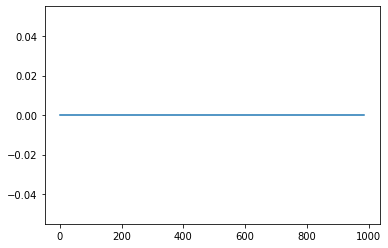

In [2]:
wt = 0.1
temp = chainFC(n = 14, phi = -Fibonacci[13]-Fibonacci[9]+Fibonacci[6]-Fibonacci[2]-1,u = 0, v = 0, w = wt)
plt.plot(temp["t"] - temp["t"][::-1])

/Users/gautam/Dropbox/Notebooks/proximitylib.py:121: RuntimeWarning: divide by zero encountered in true_divide
  while any([err/Del>0.001 and err>0.01*(np.max(self.Delta)+0.01) for err,Del in zip(err_Delta, self.Delta)]):
/Users/gautam/Dropbox/Notebooks/proximitylib.py:121: RuntimeWarning: invalid value encountered in true_divide
  while any([err/Del>0.001 and err>0.01*(np.max(self.Delta)+0.01) for err,Del in zip(err_Delta, self.Delta)]):
//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


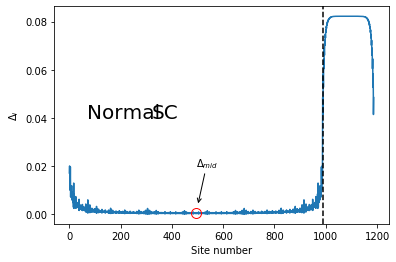

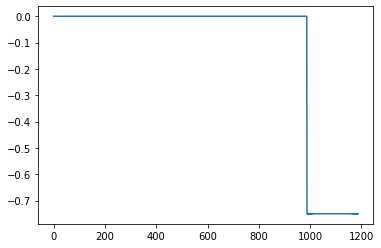

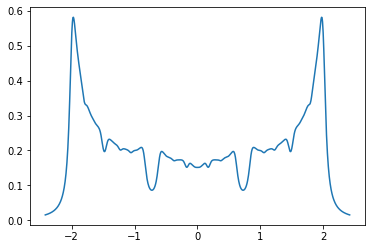

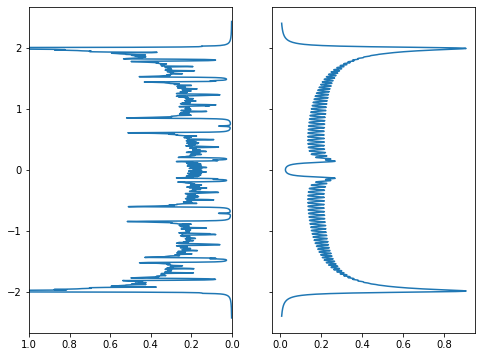

In [3]:
wt = 0.1
# chain = hybrid_ring(chain1D(233, u = 0, v = 0, wt = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 2000)
chain = hybrid_ring(chainFC(n = 14, phi = -Fibonacci[13]-Fibonacci[9]+Fibonacci[6]-Fibonacci[2]-1,u = 0, v = 0, w = wt), chain1D(199, u = 0.75, v = -1.5, wt = 0), t_int = -1, beta = 2000)

plt.plot(chain.Delta)
plt.xlabel("Site number")
plt.ylabel("$\Delta_i$")
plt.axvline(chain.NN, linestyle = "--", color = "k")
plt.annotate("SC",(320,0.04), fontsize = 20)
plt.annotate("Normal",(70,0.04), fontsize = 20)
plt.annotate("$\Delta_{mid}$", (chain.NN//2, chain.Delta[chain.NN//2]), (chain.NN//2, 0.02), arrowprops = dict(arrowstyle="->", shrinkB = 10))
plt.plot(chain.NN//2, chain.Delta[chain.NN//2].real,"o", ms = 10, mew = 1, mec = 'r', mfc = 'none')
# plt.title("w = {}".format(wt))
plt.show()
             
plt.plot(chain.Pot)
plt.show()


DOS, eex = chain.get_DOS(gam = 0.05)
plt.plot(eex, DOS)
plt.show()

fig, axes = plt.subplots(1,2, figsize = (8,6), sharey = "all")

DOS_N, eex_N = chain.Norm_comp.get_DOS()
DOS_SC, eex_SC = chain.SC_comp.get_DOS()

axes[0].plot(chain.Norm_comp.DOS,eex_N)
axes[0].set_xlim([1,0])
axes[1].plot(chain.SC_comp.DOS, eex_SC)
plt.show()

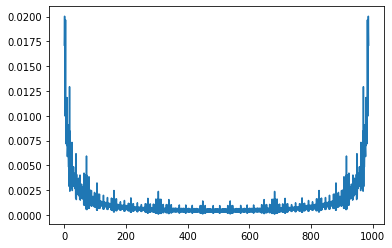

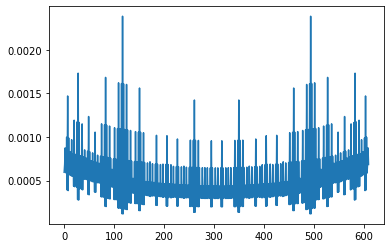

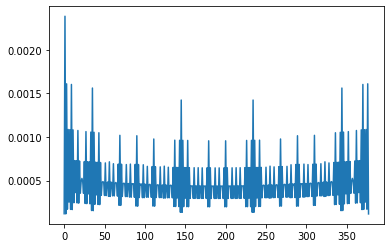

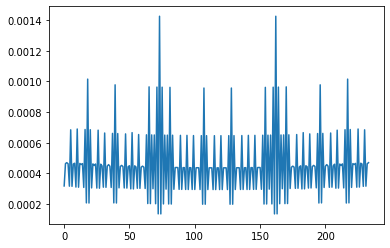

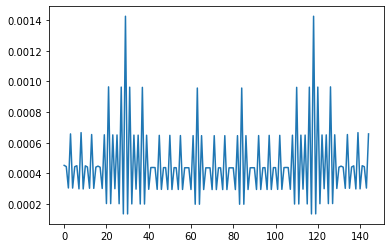

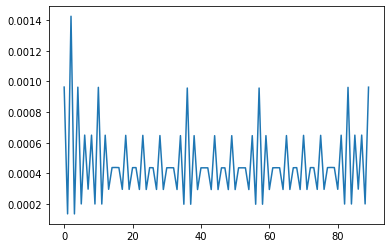

In [8]:
data987 = chain.Delta[:chain.NN].real

plt.plot(data987)
plt.show()
sub610 = data987[377//2:-377//2]
sub377 = sub610[233//2:-233//2]
sub233 = sub377[144//2:-144//2]
sub144 = sub233[89//2:-89//2]
sub89 = sub144[55//2:-55//2]
plt.plot(sub610)
plt.show()
plt.plot(sub377)
plt.show()
plt.plot(sub233)
plt.show()
plt.plot(sub144)

plt.show()
plt.plot(sub89)
plt.show()

Text(0.04, 0.5, '$\\Delta_i$')

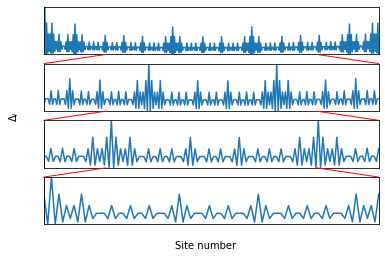

In [62]:
fig, axes = plt.subplots(4,1)

for (ax, sub, LL) in zip(axes, (sub377, sub233, sub144, sub89), (377,233,144,89)):
    ax.plot(sub)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.margins(0,0)
    ax.axvline()

for (ax, sub, LL) in zip(axes[:-1], (sub377, sub233, sub144), (144,89,55)):
    ax.annotate("", (1/2*1/tau**2,0), (0,-1/5), arrowprops = dict(arrowstyle="-", color = "red", shrinkA = 0, shrinkB = 2), xycoords = "axes fraction")
    ax.annotate("", (1 - 1/2*1/tau**2,0), (1,-1/5), arrowprops = dict(arrowstyle="-", color = "red", shrinkA = 0, shrinkB = 2), xycoords = "axes fraction")

fig.text(0.5, 0.04, 'Site number', ha='center')
fig.text(0.04, 0.5, '$\Delta_i$', va='center', rotation='vertical')


In [ ]:
qs = [1, 2, 3, 4]
ms = []
for q in qs:
    ms.append((1/610)*np.sum(sub610**q))
plt.plot(qs, ms, "o")
plt.title("{:.2e}, {:.2e}, {:.2e}, {:.2e}".format(*ms))
plt.show()

In [ ]:
tau = tau_n[14]
[plt.plot(np.log(ms), "o", ms = size, mew = 2, mfc = "none",  label = "n ={}, L = {}".format(step,sub)) for step, sub, size, ms in zip([0,1,2,3],[377,233,144,89],[20,15,10,5],[ms377, np.array(ms233)*tau, np.array(ms144)*tau**2, np.array(ms89)*tau**3])]
plt.xlabel("q")
plt.ylabel("$log(m_{q}^{(n)} \\tau^n)$")
plt.legend()
plt.show()

In [ ]:
DeltaN = chain.Delta[:chain.NN]
# DeltaN = np.random.rand(chain.NN)
n = 14
Delta_m = []
Delta_0 = DeltaN
for m in range(1,7):
    Delta_0 = Delta_0[Fibonacci[n-m-1]//2:-Fibonacci[n-m-1]//2]
    Delta_m.append(Delta_0)
    
qs = [0,1,2,3,4,5,6]
for Delta in Delta_m[1:]:
    N = len(Delta)
#     plt.plot(Delta)
#     plt.title(Delta.shape)
    m_q = [1/N*np.sum(Delta**q).real for q in qs]
    plt.plot(np.log(m_q),"o", label = "{}".format(N))

plt.legend()

mod = lmf.models.LinearModel()
pars = mod.guess(np.log(m_q), x = qs)
fit = mod.fit(np.log(m_q), pars, x = qs)

fit.fit_report()





100%|██████████| 50/50 [07:51<00:00,  9.57s/it]

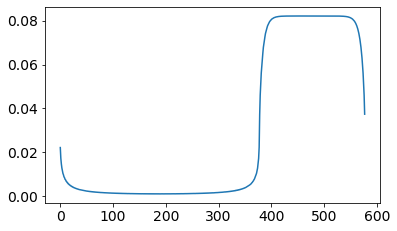

In [48]:
############ Finite size scaling for the Fibonacci case
wt = 0.1
n = 12
L = Fibonacci[n]
N_trials = 50

Deltas = np.ones(L+1+200)
for phi in tqdm(range(N_trials)):
    phi = phi*L//N_trials
    chain = hybrid_ring (chainFC(n = n, phi = phi, w = wt), chain1D(199,u = 0.75,v=-1.5), t_int = -1, beta = 2000)
    Deltas *= np.real(chain.Delta)**(1/N_trials)
    #plt.plot(chain.Delta)

Delta_avg = Deltas

plt.plot(Delta_avg)


In [49]:
Delta_avgs[-2] = Delta_avg

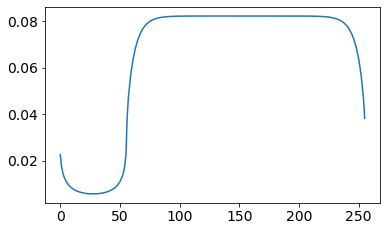

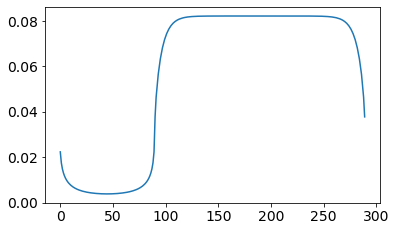

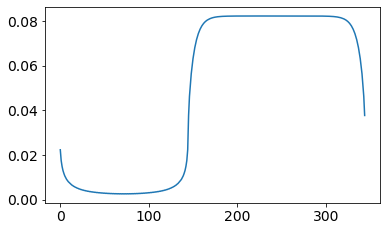

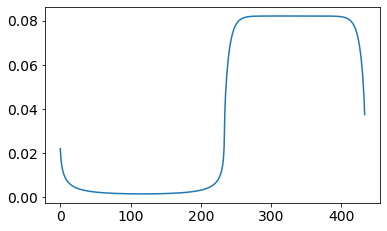

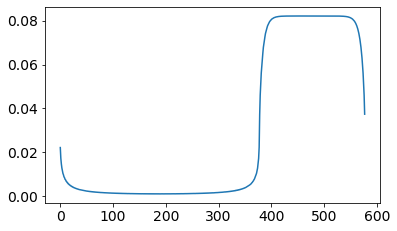

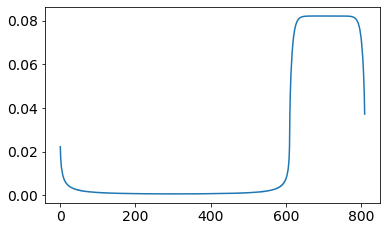

In [51]:
Delta_mids = []
for L, Delta_avg in zip(Lengths, Delta_avgs):
    plt.plot(Delta_avg)
    plt.show()
    Delta_mids.append(Delta_avg[(L+1)//2])
    

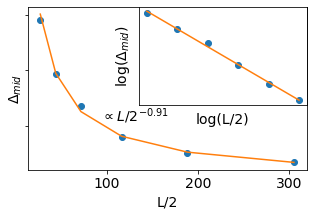

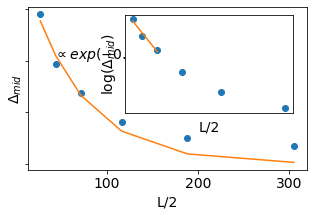

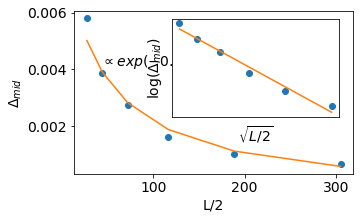

In [52]:
temp = scaling(np.array(Lengths)[:]/2, np.array(Delta_mids)[:])

temp.fit_to_pow()
temp.fit_to_exp()
temp.fit_to_expstr()

In [ ]:
Notes: case 377 and 610, only 50 evenly spaced phis were taken